## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [2]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [5]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "None"

In [4]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 220s 1us/step


In [27]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [18]:
len(x_train)

50000

In [28]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

# 五個隱藏層

In [32]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model=build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [33]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [34]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0715 13:39:31.072683  8652 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 13:39:31.079684  8652 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [35]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0715 13:39:33.121138  8652 deprecation.py:323] From C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0715 13:39:33.173158  8652 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 182us/step - loss: 2.0385 - acc: 0.2495 - val_loss: 1.8723 - val_acc: 0.3169
Epoch 2/100
50000/50000 [==============================] - 9s 175us/step - loss: 1.8120 - acc: 0.3461 - val_loss: 1.7486 - val_acc: 0.3715
Epoch 3/100
50000/50000 [==============================] - 9s 175us/step - loss: 1.7080 - acc: 0.3835 - val_loss: 1.6623 - val_acc: 0.4047
Epoch 4/100
50000/50000 [==============================] - 9s 177us/step - loss: 1.6366 - acc: 0.4108 - val_loss: 1.5857 - val_acc: 0.4358
Epoch 5/100
50000/50000 [==============================] - 9s 177us/step - loss: 1.5719 - acc: 0.4317 - val_loss: 1.5928 - val_acc: 0.4332
Epoch 6/100
50000/50000 [==============================] - 8s 169us/step - loss: 1.5235 - acc: 0.4551 - val_loss: 1.5747 - val_acc: 0.4328
Epoch 7/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.4843 - acc: 0.4679 - val_loss: 1.

50000/50000 [==============================] - 9s 171us/step - loss: 0.5843 - acc: 0.7897 - val_loss: 2.0592 - val_acc: 0.4961
Epoch 60/100
50000/50000 [==============================] - 9s 171us/step - loss: 0.5811 - acc: 0.7934 - val_loss: 1.9241 - val_acc: 0.5142
Epoch 61/100
50000/50000 [==============================] - 9s 172us/step - loss: 0.5582 - acc: 0.8000 - val_loss: 2.0482 - val_acc: 0.4995
Epoch 62/100
50000/50000 [==============================] - 9s 173us/step - loss: 0.5472 - acc: 0.8052 - val_loss: 2.0212 - val_acc: 0.5180
Epoch 63/100
50000/50000 [==============================] - 8s 166us/step - loss: 0.5369 - acc: 0.8064 - val_loss: 1.9884 - val_acc: 0.5054
Epoch 64/100
50000/50000 [==============================] - 8s 169us/step - loss: 0.5263 - acc: 0.8127 - val_loss: 2.0779 - val_acc: 0.5003
Epoch 65/100
50000/50000 [==============================] - 8s 167us/step - loss: 0.5386 - acc: 0.8066 - val_loss: 2.0609 - val_acc: 0.5121
Epoch 66/100
50000/50000 [=======

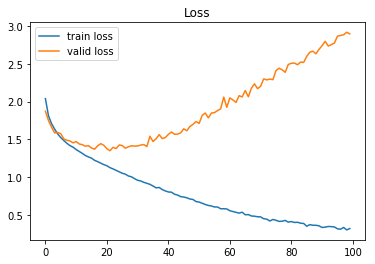

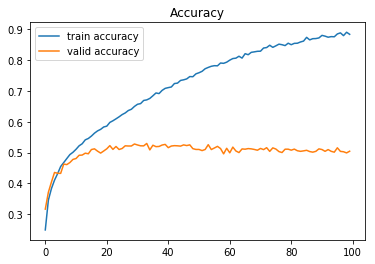

In [37]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()